# Regression Example

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Generate synthetic dataset for regression
n = 500
df = pd.DataFrame(
    {
        "id": range(1, n + 1),
        "age": np.random.randint(18, 70, n),
        "income": np.random.randint(20000, 120000, n),
        "gender": np.random.choice(["Male", "Female"], n),
        "region": np.random.choice(["North", "South", "East", "West"], n),
        "purchases": np.random.poisson(5, n),
        "spend": np.random.randint(100, 5000, n) + np.random.randn(n) * 100,
    }
)

# Save CSV file
df.to_csv("sample_regression_data.csv", index=False)
print("Dataset saved as sample_regression_data.csv")
df.head()


Dataset saved as sample_regression_data.csv


,id,age,income,gender,region,purchases,spend
0,1,26,56377,Male,West,9,565.202100
1,2,22,33450,Female,North,7,277.970676
2,3,30,22141,Female,South,0,456.141660
3,4,56,82622,Male,East,6,5001.072922
4,5,61,46332,Male,East,7,1163.604463


MSE: 3020432.2585485145
R^2 Score: -0.578589162128283


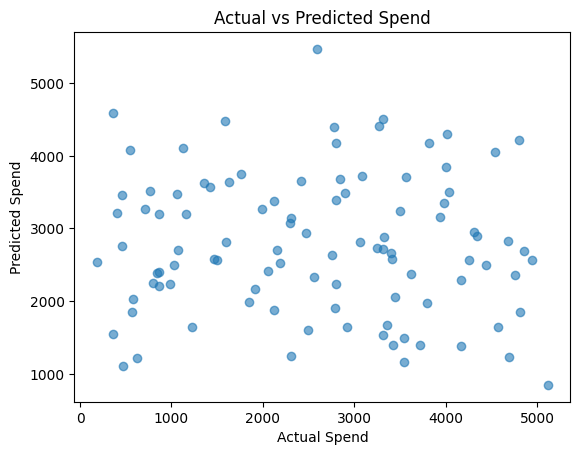

In [2]:

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['region'] = LabelEncoder().fit_transform(df['region'])

X = df.drop(columns=["id", "spend"])
y = df["spend"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Spend")
plt.ylabel("Predicted Spend")
plt.title("Actual vs Predicted Spend")
plt.show()
